In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### Read and examine data

In [84]:
data=pd.read_csv("heart_disease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0


In [85]:
data.shape

(908, 13)

In [86]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


#### There are 6 numerical columns and 7 categorical columns

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


#### The field oldpeak has 62 null values

In [88]:
data.nunique()

age          49
sex           2
cp            4
trestbps     85
chol        228
fbs           2
restecg       3
thalch      122
exang         3
oldpeak      53
slope         3
thal          3
num           5
dtype: int64

In [89]:
data.skew()

C:\Users\Dell\AppData\Local\Temp\ipykernel_29444\1188251951.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


age        -0.136797
trestbps    0.353650
chol       -0.564766
fbs         1.473485
thalch     -0.219555
oldpeak     1.021709
num         0.951409
dtype: float64

### Data Imputation

In [90]:
oldpeak_mean=data['oldpeak'].mean()
oldpeak_mean

0.8912529550827422

In [91]:
data.fillna(
    {
        'old_peak':oldpeak_mean
    },inplace=True
)

### Data Visualisation

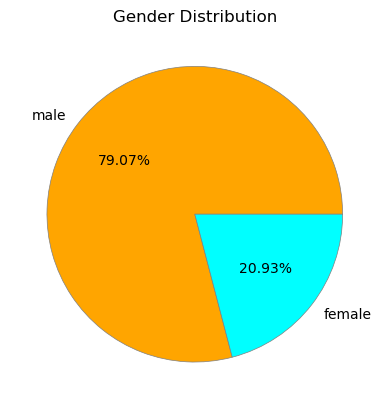

In [92]:
plt.title("Gender Distribution"),
plt.pie(data['sex'].value_counts(),labels=['male','female'],
       autopct='%0.2f%%',
       textprops={'fontsize':10},
       wedgeprops={'edgecolor':'grey','linewidth':0.5},
    colors=['orange','cyan','grey']
       )
plt.show()

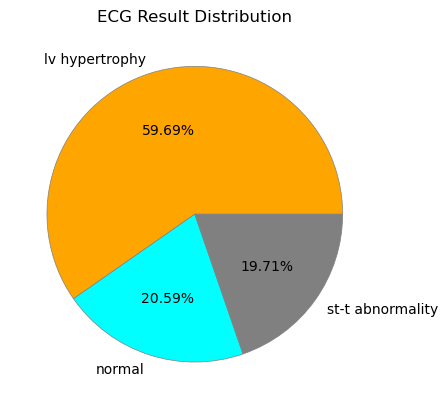

In [93]:
plt.title("ECG Result Distribution"),
plt.pie(data['restecg'].value_counts(),labels=data['restecg'].unique(),
       autopct='%0.2f%%',
       textprops={'fontsize':10},
       wedgeprops={'edgecolor':'grey','linewidth':0.5},
    colors=['orange','cyan','grey']
       )
plt.show()

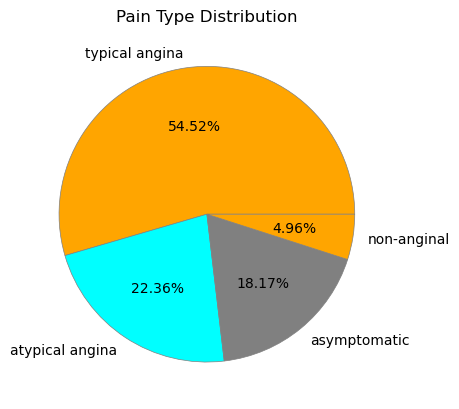

In [94]:
plt.title("Pain Type Distribution"),
plt.pie(data['cp'].value_counts(),labels=data['cp'].unique(),
       autopct='%0.2f%%',
       textprops={'fontsize':10},
       wedgeprops={'edgecolor':'grey','linewidth':0.5},
    colors=['orange','cyan','grey']
       )
plt.show()

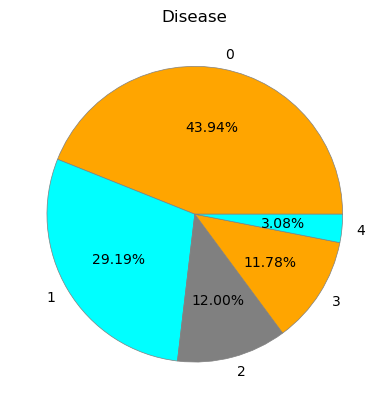

In [95]:
plt.title("Disease"),
plt.pie(data['num'].value_counts(),labels=data['num'].unique(),
       autopct='%0.2f%%',
       textprops={'fontsize':10},
       wedgeprops={'edgecolor':'grey','linewidth':0.5},
    colors=['orange','cyan','grey']
       )
plt.show()

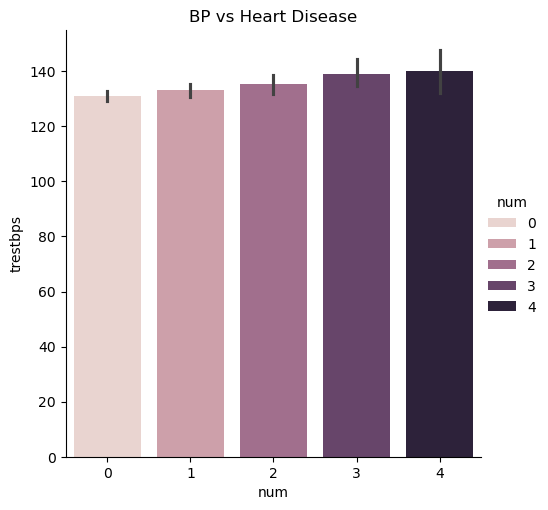

In [96]:
sns.catplot(data,x='num',y='trestbps',kind='bar',hue='num')
plt.title("BP vs Heart Disease")
plt.show()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'age'),
  Text(1, 0, 'trestbps'),
  Text(2, 0, 'chol'),
  Text(3, 0, 'fbs'),
  Text(4, 0, 'thalch'),
  Text(5, 0, 'oldpeak'),
  Text(6, 0, 'num')])

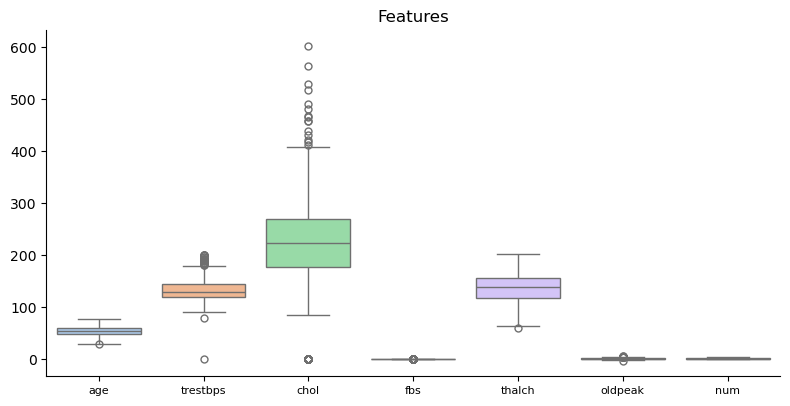

In [97]:
sns.catplot(data,
            kind='box',
            height=4,
            aspect=2,
            palette='pastel')

plt.title('Features')
plt.xticks(fontsize=8)

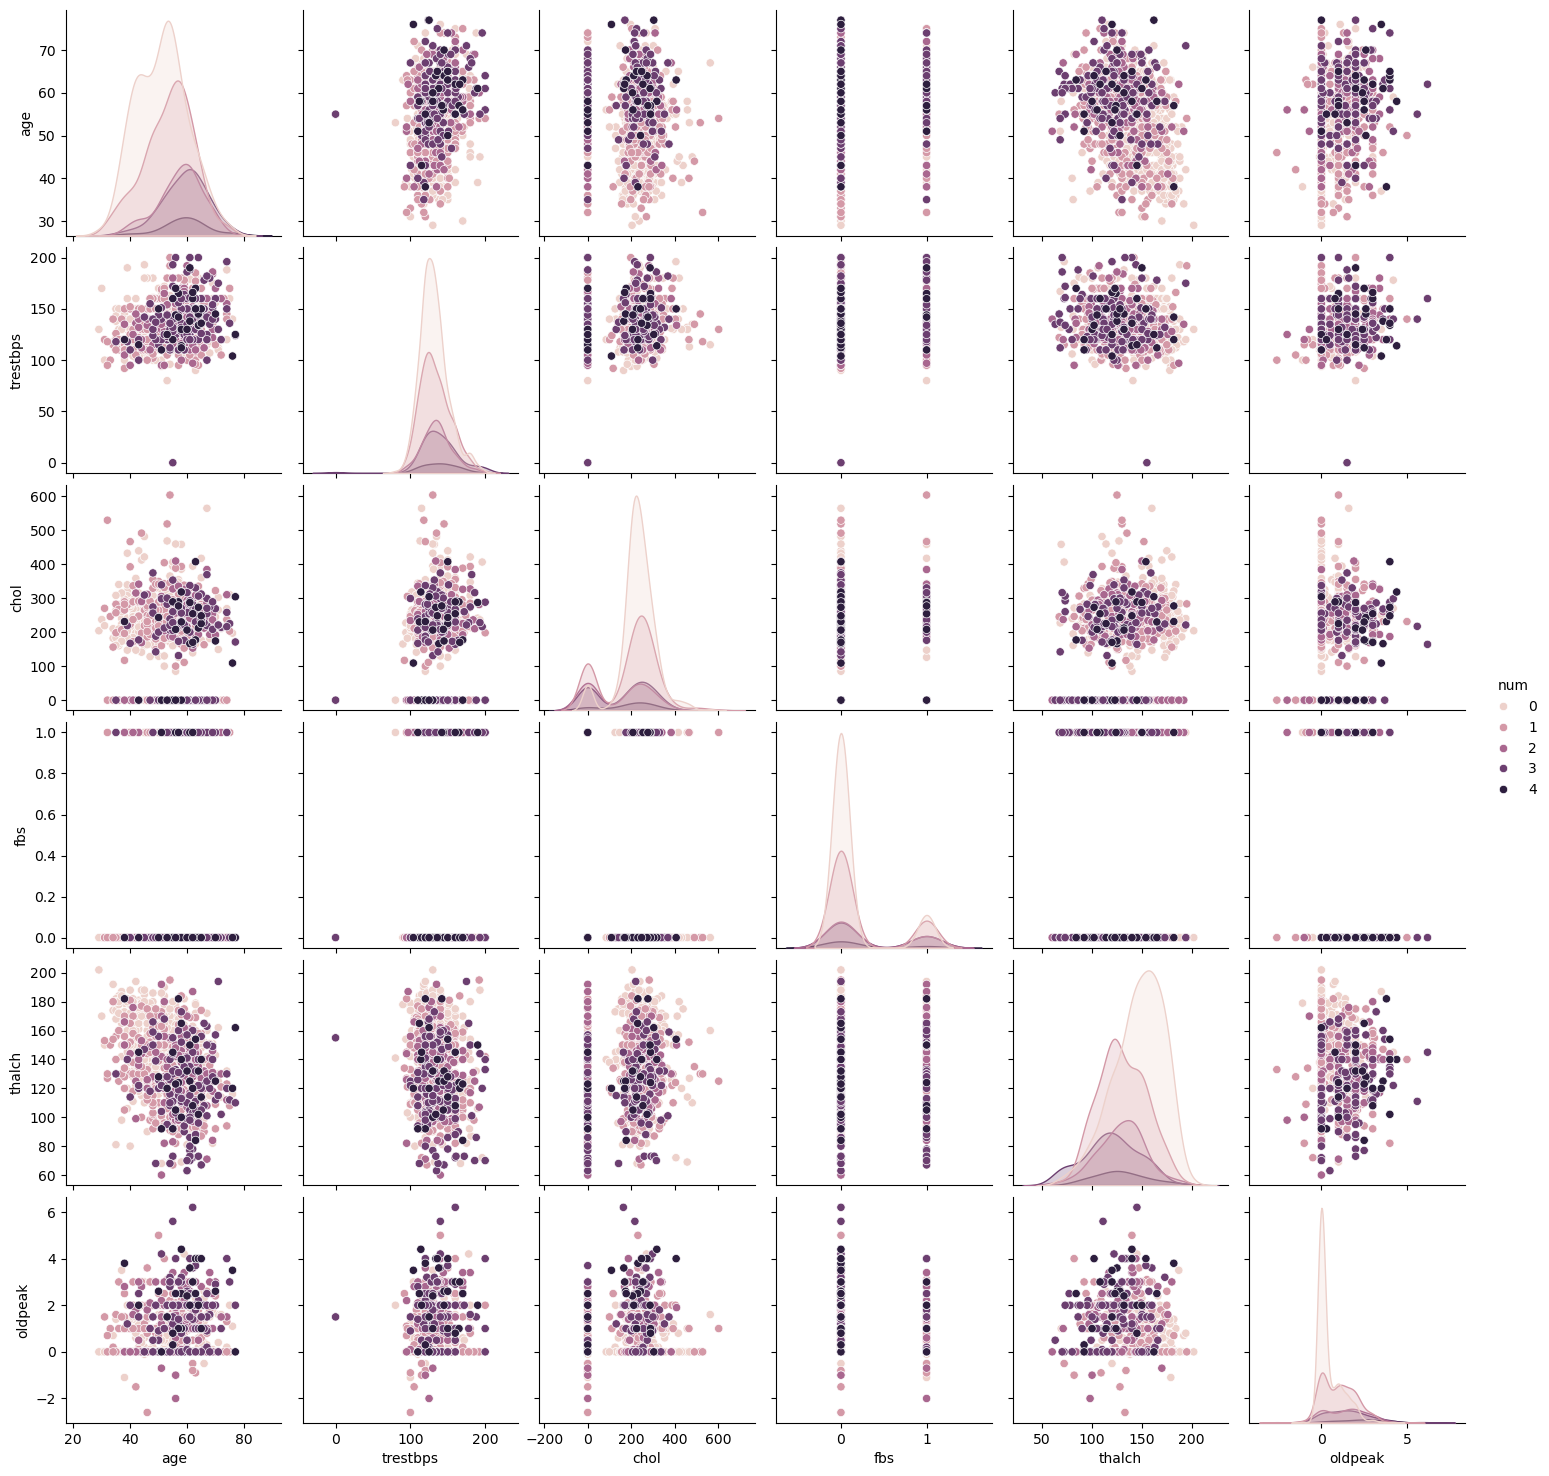

In [98]:
sns.pairplot(data,hue='num')

<Axes: >

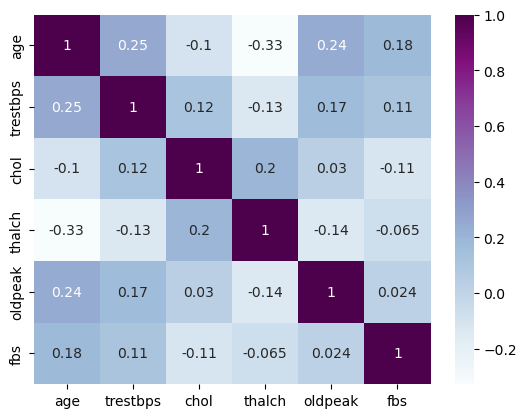

In [99]:
sns.heatmap(data[['age','trestbps','chol','thalch','oldpeak','fbs']].corr(),annot=True,cmap="BuPu")

### Feature Engineering

##### Lets Look at the distribution of numerical columns to decide if they need scaling

<Axes: xlabel='age', ylabel='Density'>

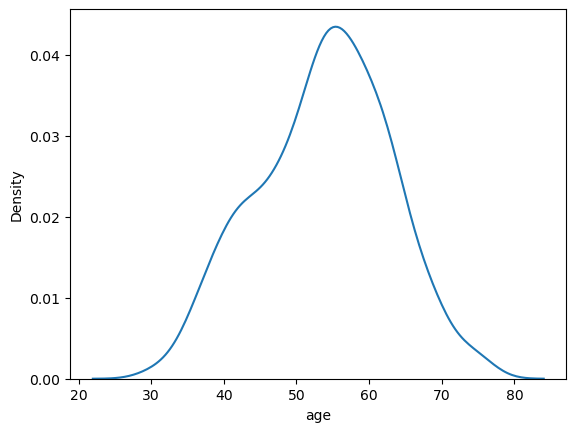

In [100]:
sns.kdeplot(data['age'])

<Axes: xlabel='fbs', ylabel='Density'>

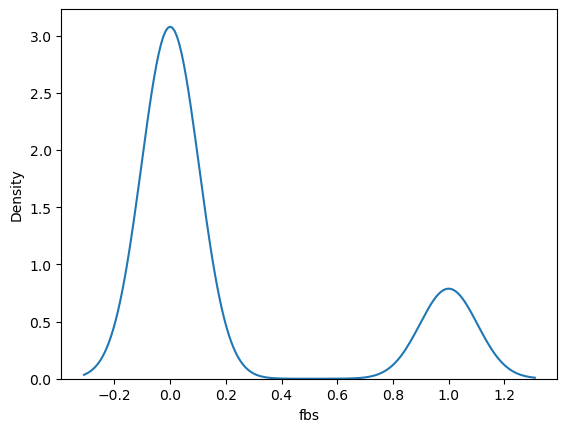

In [101]:
sns.kdeplot(data['fbs'])

<Axes: xlabel='chol', ylabel='Density'>

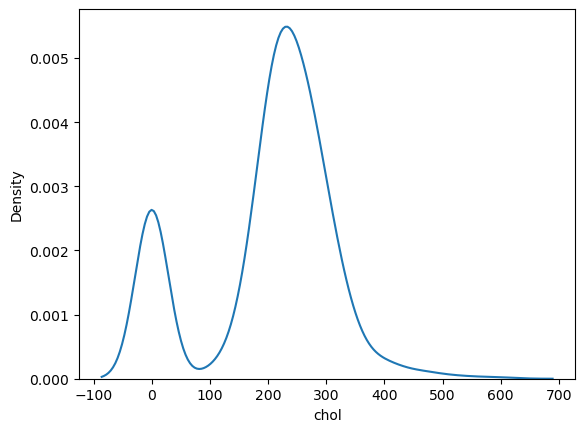

In [102]:
sns.kdeplot(data['chol'])

<Axes: xlabel='trestbps', ylabel='Density'>

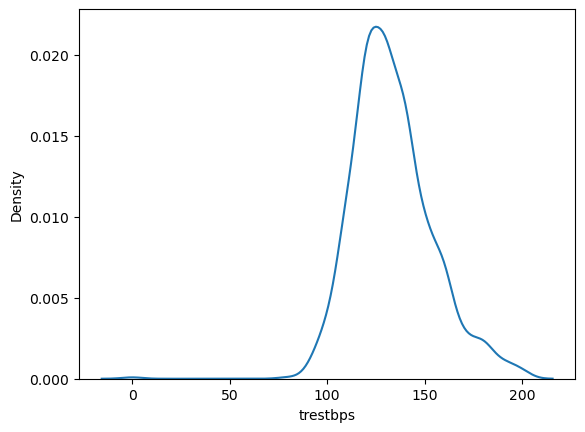

In [103]:
sns.kdeplot(data['trestbps'])

<Axes: xlabel='oldpeak', ylabel='Density'>

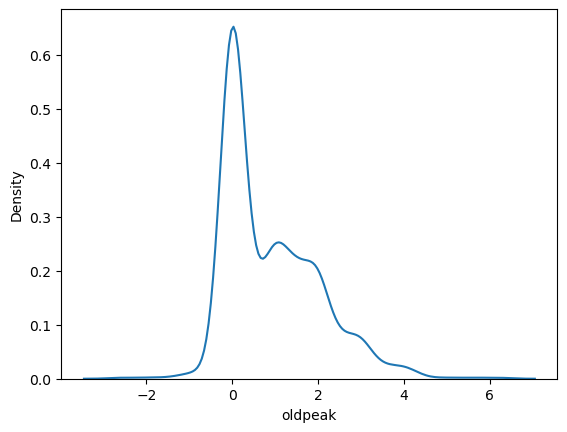

In [104]:
sns.kdeplot(data['oldpeak'])

<Axes: xlabel='thalch', ylabel='Density'>

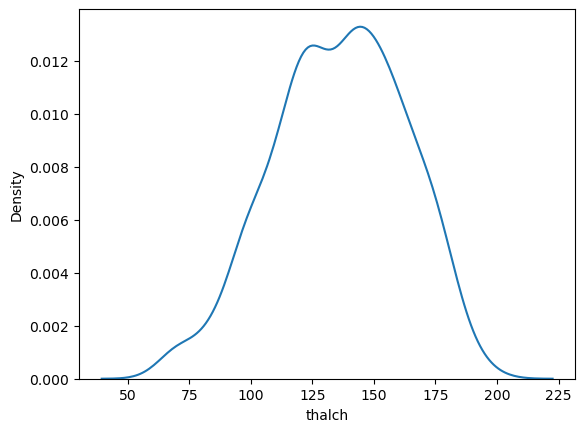

In [105]:
sns.kdeplot(data['thalch'])

#### Scaling Numerical Data 

In [106]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [190]:
scaled_data.fillna(
    {
        'oldpeak':oldpeak_mean
    },inplace=True
)

In [191]:
scaled_data

,age,trestbps,chol,fbs,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,...,restecg_st-t abnormality,exang_FALSE,exang_TRUE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,True,150,2.300000,0,0,1,0,...,0,1,0,0,1,0,0,1,0,0
1,41,135,203,False,132,0.000000,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
2,57,140,192,False,148,0.400000,0,0,1,1,...,0,1,0,0,0,1,0,1,0,0
3,52,118,186,False,190,0.000000,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
4,57,110,201,False,126,1.500000,0,0,1,1,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,False,120,1.500000,4,0,1,1,...,0,1,0,0,0,0,1,1,0,0
904,62,166,170,False,120,3.000000,4,0,1,1,...,1,0,1,0,0,1,0,0,1,0
905,56,170,0,False,123,2.500000,4,0,1,0,...,0,0,1,0,1,0,0,1,0,0
906,56,144,208,True,105,0.891253,4,0,1,0,...,1,0,0,1,1,0,0,1,0,0


#### Encoding Categorical Data

In [192]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [193]:
scaled_data=pd.get_dummies(data)

### Split data

In [194]:
Y=scaled_data['num']
Y

0      0
1      0
2      0
3      0
4      0
      ..
903    4
904    4
905    4
906    4
907    4
Name: num, Length: 908, dtype: int64

In [195]:
X=scaled_data.drop(columns=['num'],axis=1)
cat_cols = X.select_dtypes(exclude=["int64", "float64"]).columns
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

In [197]:
X.fillna(
    {
        'oldpeak':oldpeak_mean
    },inplace=True
)
X

,age,trestbps,chol,fbs,thalch,oldpeak,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,...,restecg_st-t abnormality,exang_FALSE,exang_TRUE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,1,150,2.300000,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
1,41,135,203,0,132,0.000000,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
2,57,140,192,0,148,0.400000,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0
3,52,118,186,0,190,0.000000,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
4,57,110,201,0,126,1.500000,0,1,1,0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,0,120,1.500000,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
904,62,166,170,0,120,3.000000,0,1,1,0,...,1,0,1,0,0,1,0,0,1,0
905,56,170,0,0,123,2.500000,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
906,56,144,208,1,105,0.891253,0,1,0,0,...,1,0,0,1,1,0,0,1,0,0


In [198]:
from sklearn.model_selection import train_test_split

In [199]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

In [200]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((726, 24), (182, 24), (726,), (182,))

### Build Model 

In [201]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [126]:
clf=DecisionTreeClassifier(max_depth=6,random_state=42,min_samples_leaf=3,max_features=13)
clf.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=6, max_features=13, min_samples_leaf=3,
                       random_state=42)

In [127]:
train_predict=clf.predict(xtrain)

### Eval Training data

In [128]:
print(classification_report(ytrain,train_predict))

              precision    recall  f1-score   support

           0       0.73      0.93      0.82       319
           1       0.61      0.66      0.63       212
           2       0.61      0.23      0.33        87
           3       0.64      0.40      0.49        86
           4       0.62      0.23      0.33        22

    accuracy                           0.68       726
   macro avg       0.64      0.49      0.52       726
weighted avg       0.67      0.68      0.65       726



In [129]:
cm=confusion_matrix(ytrain,train_predict)
cm

array([[296,  22,   0,   1,   0],
       [ 64, 140,   4,   4,   0],
       [ 17,  38,  20,  11,   1],
       [ 22,  25,   3,  34,   2],
       [  4,   4,   6,   3,   5]], dtype=int64)

### Eval Testing data

In [130]:
test_predict=clf.predict(xtest)

In [131]:
print(classification_report(ytest,test_predict))

              precision    recall  f1-score   support

           0       0.71      0.81      0.76        80
           1       0.43      0.58      0.50        53
           2       0.00      0.00      0.00        22
           3       0.18      0.10      0.12        21
           4       0.50      0.17      0.25         6

    accuracy                           0.54       182
   macro avg       0.36      0.33      0.33       182
weighted avg       0.47      0.54      0.50       182



In [132]:
imp=clf.feature_importances_
imp

array([0.13134329, 0.07109622, 0.1032165 , 0.00505578, 0.0615133 ,
       0.07787402, 0.        , 0.0467859 , 0.30857109, 0.        ,
       0.        , 0.00743626, 0.00913798, 0.01244002, 0.0399137 ,
       0.04787577, 0.        , 0.        , 0.00716731, 0.01453536,
       0.0219392 , 0.0029109 , 0.00935647, 0.02183093])

### Analysis

The Decision Tree model shows moderate performance with 54% accuracy, heavily favoring the majority class (class 0). Minority classes (2–4) suffer from poor recall and F1-scores, indicating class imbalance and overfitting. The macro average F1 of 0.35 highlights unfair treatment across classes. Pruning, rebalancing can significantly improve minority-class prediction.




In [133]:
data['num']=data['num'].astype('category')
print(X.columns)

Index(['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'sex_Female',
       'sex_Male', 'cp_asymptomatic', 'cp_atypical angina', 'cp_non-anginal',
       'cp_typical angina', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_FALSE', 'exang_TRUE', 'exang_TURE',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


[Text(0.5, 0.9, 'cp_asymptomatic <= 0.5\ngini = 0.692\nsamples = 726\nvalue = [319, 212, 87, 86, 22]\nclass = 0'),
 Text(0.25, 0.7, 'chol <= 50.0\ngini = 0.459\nsamples = 336\nvalue = [239, 58, 16, 19, 4]\nclass = 0'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'trestbps <= 121.5\ngini = 0.752\nsamples = 40\nvalue = [11, 12, 9, 7, 1]\nclass = 1'),
 Text(0.0625, 0.3, 'oldpeak <= -0.05\ngini = 0.659\nsamples = 19\nvalue = [5, 9, 1, 4, 0]\nclass = 1'),
 Text(0.03125, 0.1, '\n  (...)  \n'),
 Text(0.09375, 0.1, '\n  (...)  \n'),
 Text(0.1875, 0.3, 'thal_reversable defect <= 0.5\ngini = 0.73\nsamples = 21\nvalue = [6, 3, 8, 3, 1]\nclass = 2'),
 Text(0.15625, 0.1, '\n  (...)  \n'),
 Text(0.21875, 0.1, '\n  (...)  \n'),
 Text(0.375, 0.5, 'oldpeak <= 0.75\ngini = 0.38\nsamples = 296\nvalue = [228, 46, 7, 12, 3]\nclass = 0'),
 Text(0.3125, 0.3, 'age <= 56.5\ngini = 0.253\nsamples = 194\nvalue = [166, 23, 3, 2, 0]\nclass = 0'),
 Text(0.28125, 0.1, '\n  (...)  \n'),
 Text(0.34375, 0.1, '\n  (.

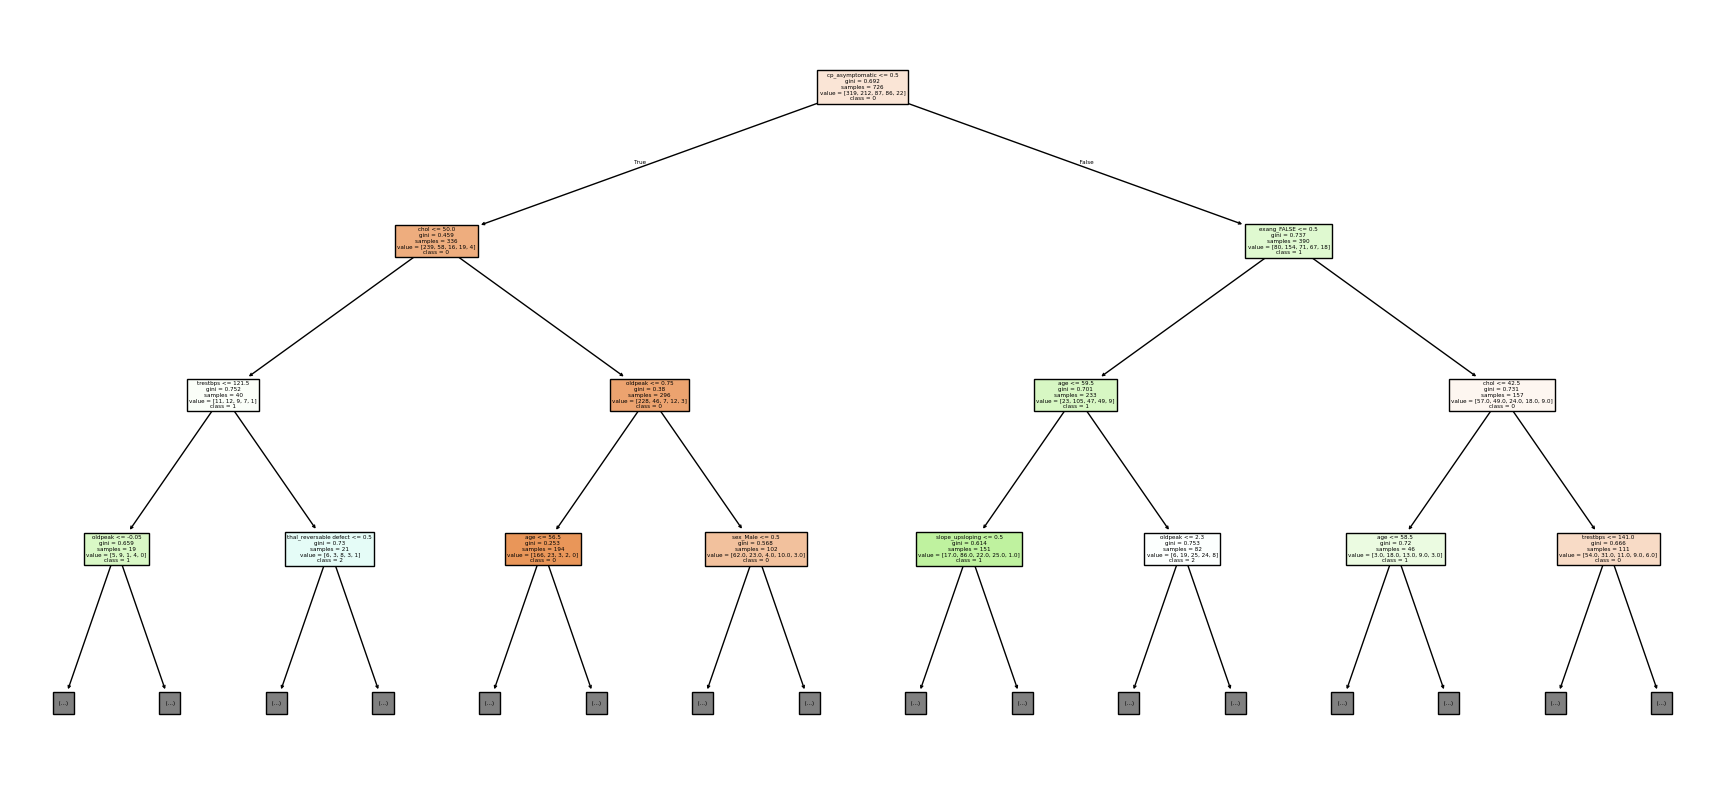

In [134]:
plt.figure(figsize=(22,10))
from sklearn import tree
tree.plot_tree(
    clf,
    feature_names=X.columns,max_depth=3,
    class_names=["0","1","2","3","4"],
    filled=True)

### Interview Questions
**1. Common Hyperparameters in Decision Trees:**
Key hyperparameters include max_depth (limits tree height to prevent overfitting), min_samples_split and min_samples_leaf (control node creation), and max_features (limits number of features considered for splits). Tuning these balances bias-variance trade-off: overly deep trees may overfit, while shallow ones may underfit.


**2. Label Encoding vs One-Hot Encoding:**
Label Encoding assigns unique integers to categories (e.g., red = 0, green = 1). It's compact but can introduce unintended order. One-Hot Encoding creates separate binary columns for each category, avoiding ordinal relationships. One-hot is safer for nominal features, especially in linear models, but increases dimensionality.
